### 판매데이터 로드 및 플레이버 검색

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

path = 'C:/Windows/Fonts/malgun.ttf'
font_name = fm.FontProperties(fname=path, size=50).get_name()
plt.rc('font', family=font_name)

In [2]:
# 10개월(21년2월~12월) 의 판매데이터 활용 
import os
import pandas as pd
path = './dataset'
files = os.listdir(path)[1:]
files = [path+'/'+file for file in files]

df = pd.concat({c.split('/')[-1].split('.')[0]:pd.read_csv(c,encoding= "EUC-KR",index_col=None) for c in files})
df = df.reset_index().drop('level_1', axis=1)
c = ['YYMM', 'CMP_CD', 'ITEM_PLU_CD', 'ITEM', 'SALE_QTY']
df.columns = c
df.ITEM= df.ITEM.apply(lambda x: x.strip()).apply(lambda x: x.replace('\u3000',''))

ITEM = df.ITEM.unique()
{str(df[df.ITEM == c]['ITEM_PLU_CD'].unique()[0]):[str(c),] for c in ITEM}

def check_name(icecream):
    nm = list(df.ITEM.unique())
    item_d = {str(df[df.ITEM == c]['ITEM_PLU_CD'].unique()[0]):str(c) for c in nm}
    df_item = pd.Series(item_d)
    check = df_item[df_item.str.contains(icecream)]
    return check,f'{len(check)}개'

check_name('꼬')

(A56071    아이스 꼬북칩
 dtype: object,
 '1개')

### 

### 월별 제품판매량 검색

YYMM
2102          0.0
2103          0.0
2104          0.0
2105          0.0
2106          0.0
2107          0.0
2108          0.0
2109          0.0
2110          0.0
2111       7732.0
2112    1565889.0
2201      23906.0
2202       3020.0
2203       1427.0
All     1601974.0
Name: 아이스 고디바 초콜릿, dtype: float64

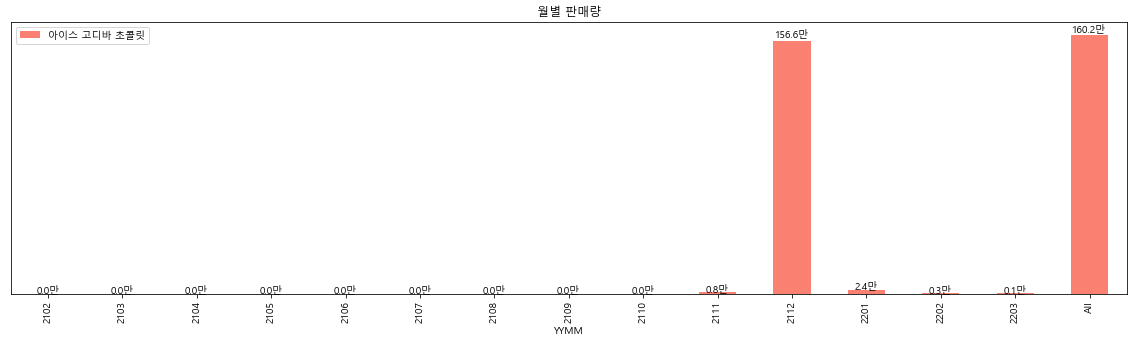

In [20]:
flavor = '아이스 고디바 초콜릿'
sale_df = df.pivot_table(values='SALE_QTY',aggfunc='sum',index='YYMM',columns=['ITEM'], margins= True).T.fillna(0).sort_values('All',ascending=False)
sale_df.loc[flavor]
ax = sale_df.loc[flavor].plot(kind= 'bar', figsize=(20,5), color ='salmon', legend = flavor, title = '월별 판매량')
ax.axes.yaxis.set_visible(False)

for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate(f"{height/1e4:0.1f}만",(left+width/2, height*1.01), ha='center')

sale_df.loc[flavor]

ITEM
아이스 고디바 초콜릿     10.30
엄마는 외계인         10.18
민트 초콜릿 칩         6.00
레인보우 샤베트         5.37
뉴욕치즈케이크          5.00
사랑에 빠진 딸기        4.30
아몬드 봉봉(사용안함)     4.17
아몬드 봉봉           4.04
체리쥬빌레            3.84
오레오 쿠키앤크림        3.71
31-요거트           3.65
New 슈팅스타         3.64
베리베리 스트로베리       3.53
바람과함께사라지다        3.30
그린티              2.67
초콜릿 무스           2.26
피스타치오 아몬드        2.15
우.낀.소            2.01
자모카 아몬드 훠지       1.79
망고탱고             1.72
Name: 2112, dtype: float64

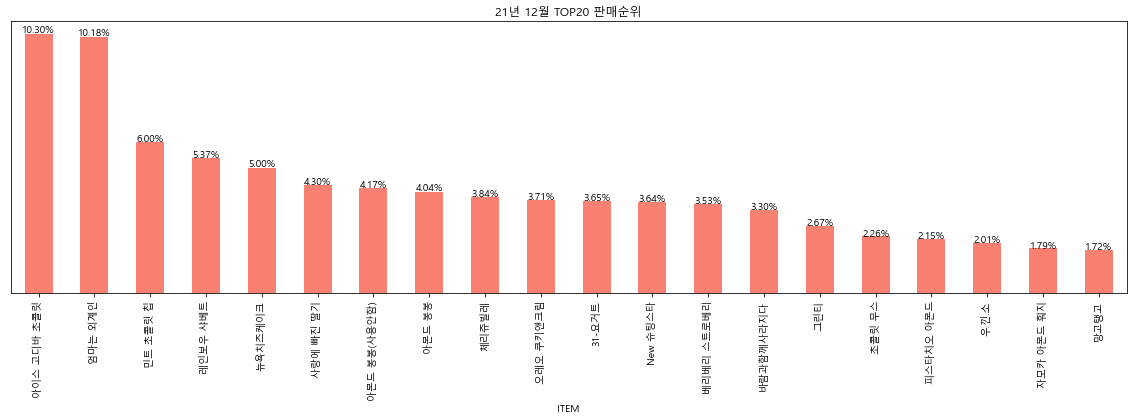

In [13]:
# 비율로 변경, 월별 판매비중 확인
sale_df_ratio = round(sale_df/sale_df.loc['All',:]*100,2)[1:]
yymm = '2112'
Top_no = 20

ax = sale_df_ratio.loc[:,yymm].sort_values(ascending = False)[:Top_no].plot(kind='bar',figsize=(20,5), color ='salmon', title = f'{yymm[:2]}년 {yymm[2:]}월 TOP{Top_no} 판매순위')
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate(f"{height:.2f}%" ,(left+width/2, height*1.01), ha='center')
ax.axes.yaxis.set_visible(False)
sale_df_ratio.loc[:,yymm].sort_values(ascending = False)[:Top_no]

In [35]:
import numpy as np

item = pd.read_csv('./리스트_copy.csv',encoding='euc-kr')
columns = ['조사일자', '제품명', '제품코드', '컨셉만족도', '외관만족도', '맛만족도', '전반만족도', '구매의향', '봄',	'여름',	'가을',	'겨울','비고']
item.columns = columns
item.제품명 = item.제품명.str.strip()
idx = 0
contents = ['ITEM_PLU_CD','SALE_QTY_MM','NO_SALE_MM']
item.iloc[[idx]]

nm2cd = {str(c):str(df[df.ITEM == c]['ITEM_PLU_CD'].unique()[0]) for c in ITEM}

def nm2cd_f(nm):
    try :
        return nm2cd[nm]
    except :
        return np.NaN

item['제품코드'] = item['제품명'].apply(lambda x : nm2cd_f(x))

# 월 평균 판매량 집계 함수 생성
def check_qty(item):
    month = sale_df.loc[item] != 0
    sale_mt_no = len(sale_df.loc[item][month])-1
    max_sales = sale_df.loc[item][:14].max()
    max_sales_month = sale_df.loc[item][:14].argmax()
    return round(sale_df.loc[item]['All'],2),round(sale_df.loc[item]['All']/sale_mt_no,2),sale_mt_no,max_sales,max_sales_month

# 상품별 월평균판매량 정렬
item_d = {idx:[df.ITEM_PLU_CD.unique()[idx], nm, check_qty(nm)[0], check_qty(nm)[1], check_qty(nm)[2],check_qty(nm)[3],check_qty(nm)[4]] for idx, nm in enumerate(df.ITEM.unique())}
item_df = pd.DataFrame(item_d).T
columns=['ITEM_PLU_CD','ITEM_NM','SALE_QTY','SALE_QTY_MM','NO_SALE_MM','SALE_QTY_MAX','SALE_MM_MAX']
item_df.columns = columns
item_df = item_df.fillna(0).sort_values('SALE_QTY_MM',ascending=False)
item_df.to_csv('./월별판매량.csv', encoding = 'euc-kr')

def sale(ft,nm):
    try :
        return item_df[item_df['ITEM_NM'] == nm][ft].values[0]
    except :
        return np.NaN
    
item['총판매량'] = item['제품명'].apply(lambda x : sale('SALE_QTY',x))
item['월평균판매량'] = item['제품명'].apply(lambda x : sale('SALE_QTY_MM',x))
item['판매개월수'] = item['제품명'].apply(lambda x : sale('NO_SALE_MM',x))
item['최대월판매량'] = item['제품명'].apply(lambda x : sale('SALE_QTY_MAX',x))
item['최대판매월'] = item['제품명'].apply(lambda x : sale('SALE_MM_MAX',x))
c = ['조사일자', '제품명', '제품코드', '컨셉만족도', '외관만족도', '맛만족도', '전반만족도', '구매의향','총판매량', '월평균판매량', '판매개월수', '최대월판매량', '최대판매월', '봄',	'여름',	'가을',	'겨울', '비고']
item = item[c]
# item.loc[:,:'최대판매월'].fillna(item.median(), inplace = True)
item.to_csv('./리스트_.csv', encoding = 'euc-kr')

# 제품코드 없는 항목 날리기 
item_dropna = pd.concat([item[item.제품코드 == c] for c in item.제품코드.dropna()])
item_dropna

,조사일자,제품명,제품코드,컨셉만족도,외관만족도,맛만족도,전반만족도,구매의향,총판매량,월평균판매량,판매개월수,최대월판매량,최대판매월,봄,여름,가을,겨울,비고
0,220427,오버더 레인보우 샤베트,A56060,5.1,5.5,5.4,5.4,5.0,1721366.0,143447.17,12.0,900152.0,4.0,0.500,1.000,0.179,0.107,NaN
1,220427,꿀에 빠진 바나나와 망고,A56063,5.3,5.4,5.4,5.3,5.0,986499.0,98649.90,10.0,653041.0,5.0,0.393,0.821,0.321,0.286,NaN
4,220511,꿀에 빠진 바나나와 망고,A56063,5.3,5.5,5.5,5.4,5.3,986499.0,98649.90,10.0,653041.0,5.0,0.607,0.929,0.107,0.107,NaN
16,220525,꿀에 빠진 바나나와 망고,A56063,5.1,5.4,5.3,5.2,5.0,986499.0,98649.90,10.0,653041.0,5.0,0.367,0.850,0.133,0.133,NaN
1,220427,꿀에 빠진 바나나와 망고,A56063,5.3,5.4,5.4,5.3,5.0,986499.0,98649.90,10.0,653041.0,5.0,0.393,0.821,0.321,0.286,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50,211213,오레오 쿠키 앤 스트로베리,A56089,5.0,5.3,5.6,5.4,5.5,858187.0,429093.50,2.0,849372.0,13.0,0.767,0.333,0.150,0.600,NaN
48,211117,사랑에 빠진 외계인,A56093,5.8,5.3,5.3,5.2,5.2,6428.0,6428.00,1.0,6428.0,13.0,0.367,0.467,0.350,0.683,NaN
52,211213,사랑에 빠진 외계인,A56093,6.0,5.6,5.3,5.1,4.9,6428.0,6428.00,1.0,6428.0,13.0,0.600,0.567,0.417,0.567,NaN
56,220104,우연한 딸기,A56090,5.0,4.6,4.7,4.5,4.2,285287.0,142643.50,2.0,271348.0,13.0,0.717,0.333,0.100,0.533,상품 2종 비교조사


C:\dev\Miniconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
C:\dev\Miniconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
C:\dev\Miniconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


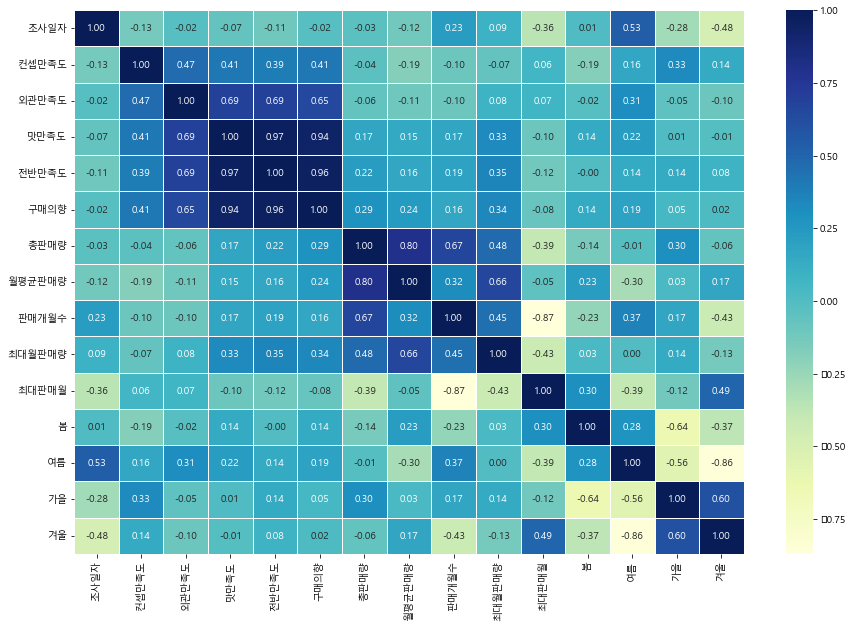

In [36]:
import seaborn as sns
corr_matrix = item_dropna.corr().round(2)
fig, ax = plt.subplots(figsize = (15,10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");

In [37]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X = item_dropna[['컨셉만족도','외관만족도','맛만족도','전반만족도','구매의향']]
y = item_dropna['월평균판매량']
X.fillna(item_dropna.median(), inplace = True)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

model = RandomForestRegressor()
model.fit(X_train,y_train)
y_preds = model.predict(X_test)
model.score(X_test,y_test)

C:\Users\david\AppData\Local\Temp\ipykernel_6080\464938990.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  X.fillna(item_dropna.median(), inplace = True)
C:\Users\david\AppData\Local\Temp\ipykernel_6080\464938990.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(item_dropna.median(), inplace = True)


0.6102534989189439

전반적인 만족도가 높은 경우 월평균판매량도 영향을 받음

In [39]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X = item_dropna[['컨셉만족도','외관만족도','맛만족도','전반만족도','구매의향']]
y = item_dropna['최대월판매량']
X.fillna(item_dropna.median(), inplace = True)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

model = RandomForestRegressor()
model.fit(X_train,y_train)
y_preds = model.predict(X_test)
model.score(X_test,y_test)

C:\Users\david\AppData\Local\Temp\ipykernel_6080\1241136789.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  X.fillna(item_dropna.median(), inplace = True)
C:\Users\david\AppData\Local\Temp\ipykernel_6080\1241136789.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(item_dropna.median(), inplace = True)


0.5411228491392153

### 맛 데이터 가져오기

In [41]:


import pickle
flavor = pd.read_csv("fb.csv", encoding='euckr').fillna(0)

with open("item_dic_cd.pickle",'rb') as fr:
    item_dic_cd = pickle.load(fr)
    
#이름 통일하기

cd = list(flavor['BR#'])
flavor.loc[[c in item_dic_cd.keys() for c in cd],'DESCRIPTION'] = flavor[[c in item_dic_cd.keys() for c in cd]]['BR#'].apply(lambda x : item_dic_cd[x])
flavor

,BR#,DESCRIPTION,Category,아이스크림1,아이스크림2,아이스크림3,아이스크림4,컨펙션1,컨펙션2,컨펙션3,리본1,리본2
0,A50111,민트 초콜릿 칩,PERMANENT,페퍼민트,0,0,0,다크초콜릿,0,0,0,0
1,A56083,New 자모카 아몬드 훠지,PERMANENT,자모카(커피),0,0,0,볶음 아몬드반태,0,0,초콜릿,0
2,A50135,피스타치오 아몬드,PERMANENT,피스타치오,0,0,0,볶음 아몬드반태,0,0,0,0
3,A56035,아몬드 봉봉,PERMANENT,바닐라,0,0,0,초콜릿아몬드,0,0,밀크초콜릿,0
4,A56084,NEW 초콜릿 무스,PERMANENT,초콜릿무스,0,0,0,초콜릿칩(플레이크),0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
79,A56025,잘될거예엿,신제품\n(18-22년도),누가,0,0,0,크런치카라멜아몬드,0,0,엿리본,0
80,A56041,초코넛 마카다미아,신제품\n(18-22년도),밀크초콜릿,코코넛,0,0,구운마카다미아분태,0,0,밀크초콜릿리본,0
81,A56043,핑크러브,신제품\n(18-22년도),민트,민트,화이트초콜릿,0,구운피스타치오,0,0,0,0
82,A56046,할로윈 조커,신제품\n(18-22년도),피스타치오,타트체리 샤베트,0,0,0,0,0,0,0


In [44]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

X = item_dropna[['컨셉만족도','외관만족도','맛만족도','전반만족도','구매의향']]
y = item_dropna['최대월판매량']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)


my_pipe = Pipeline([('mean_imputer', SimpleImputer(strategy = 'mean')),
                    ('mm_scaler', MinMaxScaler())])

X_train_fit = my_pipe.fit(X_train)
X_train_pre = X_train_fit.transform(X_train)
X_test_pre = X_train_fit.transform(X_test)
print(pd.DataFrame(X_train_pre).describe())            
y_train_fit = my_pipe.fit(y_train.to_numpy().reshape(-1,1))
y_train_pre = y_train_fit.transform(y_train.to_numpy().reshape(-1,1))
y_test_pre = y_train_fit.transform(y_test.to_numpy().reshape(-1,1))


def my_reg(df_X,df_y):
    from sklearn.linear_model import LinearRegression
    from sklearn.linear_model import Ridge, Lasso, ElasticNet # norm규제 회귀모델
    from sklearn.linear_model import ARDRegression, BayesianRidge # 베이지안 회귀
    from sklearn.ensemble import RandomForestRegressor # 앙상블 배깅
    from xgboost import XGBRegressor # 앙상블 부스팅
    from sklearn.model_selection import cross_val_score # 모델검증
    
    import ast 
    import numpy as np
    
    linear = LinearRegression()
    ridge, lasso, elasticnet = Ridge(), Lasso(), ElasticNet()
    ards_linear, baysian_ridge = ARDRegression(), BayesianRidge()
    random_forest = RandomForestRegressor()
    xgboost_linear = XGBRegressor()
    
    model_list = ['linear','ridge','lasso','elasticnet','ards_linear','baysian_ridge','random_forest','xgboost_linear']
    
    score_dic = dict()
    for model_nm in model_list:
        scores = cross_val_score(eval(model_nm),df_X,df_y,scoring='neg_mean_squared_error')
        rmse_score = np.sqrt(-scores)
        rmse_sm = rmse_score.mean()
        score_dic[model_nm] = rmse_sm
        
    score_dic = sorted(score_dic.items(), key= lambda t : t[1])
    
    return score_dic

linear_model_train_score = my_reg(X_train_pre,y_train_pre)
print(linear_model_train_score)

               0          1          2          3          4
count  52.000000  52.000000  52.000000  52.000000  52.000000
mean    0.518895   0.645905   0.725510   0.724490   0.695385
std     0.191955   0.215893   0.192538   0.190397   0.195503
min     0.000000   0.000000   0.000000   0.000000   0.000000
25%     0.375000   0.573529   0.650000   0.679731   0.600000
50%     0.540698   0.705882   0.800000   0.772727   0.760000
75%     0.578125   0.764706   0.850000   0.863636   0.810000
max     1.000000   1.000000   1.000000   1.000000   1.000000


C:\dev\Miniconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\dev\Miniconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\dev\Miniconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\dev\Miniconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 

[('random_forest', 0.1776715653994598), ('xgboost_linear', 0.1987331003328874), ('ridge', 0.20795328573314714), ('lasso', 0.2080358714182735), ('elasticnet', 0.2080358714182735), ('baysian_ridge', 0.2114332887581102), ('ards_linear', 0.2147563694955757), ('linear', 0.22338013023464764)]
